# Implementing and Testing Unsupervised Machine Learning Methods #
Author: Ayam Babu, with supervision from Tristan Kleyn and Professor Vincent Janik

Date: 24th November, 2023 (Modified 28 January, 2024)

Purpose: Student project as part of the Dolphin Acoustics Vertically Integrated Project (VIP) that classifies dolphin signature whistles. Signature whistles are used to uniquely identify individuals dolphins, and they can be useful for extrapolating the population of groups of dolphins. This project focuses on applying machine learning with Python, specifically unsupervised learning methods that do not require extensive datasets to train, to classifying dolphin whistles. The author uses the labelled Sarasota dataset from dolphins in Sarasota, Florida – where each signature whistle recorded is traceable to a known individual dolphin – to assess the effectiveness of the unsupervised learning methods.

The programmer has given it their best to document their program, but if a future team member has any further questions, they shouldn't hesitate to contact Ayam Babu at ab550@st-andrews.ac.uk.

## Table of Contents: ##
1. [Sarasota Dataset Exploration](#Sarasota-Dataset-Exploration)
2. [Deciding which models to use](#Deciding-which-models-to-use)
3. [Experiments](#Experiments)
4. [Analysis & Results](#Analysis-&-Results), final results table: [Top 5 method performances](#Top-5-method-performances)
5. [Conclusion & Future Work](#Conclusion-&-Future-Work)
6. [Past Work](#Past-Work)

## Sarasota Dataset Exploration ##

The code below is for finding, then using the dataset. The programmer explored the whistle data closer, so that he could understand the dataset he was working with.

Each cell with "In [#]:" written after it is a snippet of code that is executed individually. Some of these cells have "#" written on the first line: this is an indication that the words following the "#" on the line are comments by the programmer.

In [1]:
from os import listdir

sarasota_dir_path = "Full dataset"
sarasota_whistle_paths = listdir(sarasota_dir_path)
print(str(len(sarasota_whistle_paths)) + " whistles in the dataset")

1800 whistles in the dataset


In [2]:
# Gather individual names and signature whistles from the Sarasota dataset and store them in separate lists
import pandas as pd

individual_names = []
signature_whistles = []

for sarasota_whistle_path in sarasota_whistle_paths:
    individual_name = sarasota_whistle_path.split("-")[0]
    individual_names.append(individual_name)
    #print(sarasota_dir_path + "/" + sarasota_whistle_path)
    signature_whistle = pd.read_csv(sarasota_dir_path + "/" + sarasota_whistle_path)
    signature_whistles.append(signature_whistle)

In [3]:
# Collect the first whistle as a sample
sarasota_whistle_path_sample = sarasota_whistle_paths[0]
individual_name = sarasota_whistle_path_sample.split("-")[0]
sample_whistle = pd.read_csv(sarasota_dir_path + "/" + sarasota_whistle_path_sample)

In [4]:
# Explore a sample whistle from the dataset
# Each row represents a hydrophone (microphone in water) reading at a given time in ms
# All the readings come together to form the whistle
# For readability, the first 5 readings are shown below

sample_whistle.head()

,Time [ms],Peak Frequency [Hz],Duty Cycle,Energy,WindowRMS
0,1685963745222,8109.3750,1.352765,0.000048,0.022901
1,1685963745227,7945.3125,1.355840,0.000083,0.025138
2,1685963745233,7757.8125,1.424948,0.000066,0.027375
3,1685963745237,7593.7500,1.410701,0.000070,0.027522
4,1685963745242,7406.2500,1.420021,0.000077,0.027827


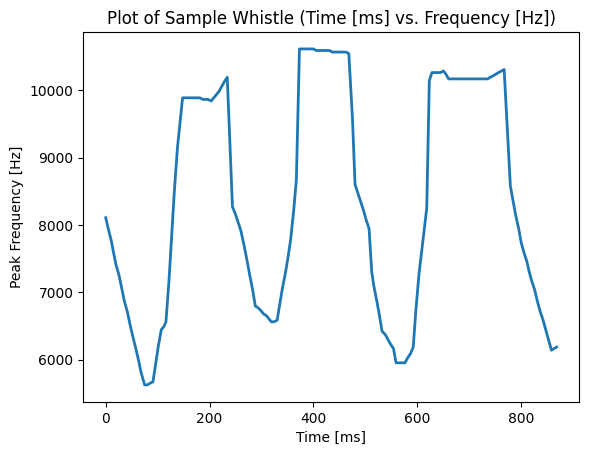

In [5]:
# Plot the first whistle / sample whistle

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(sample_whistle["Time [ms]"] - sample_whistle["Time [ms]"][0], 
        sample_whistle[" Peak Frequency [Hz]"], linewidth = 2.0)

plt.xlabel("Time [ms]")
plt.ylabel("Peak Frequency [Hz]")
plt.title("Plot of Sample Whistle (Time [ms] vs. Frequency [Hz])")

plt.show()

I was curious about the number of readings per whistle, so I decided to plot the distribution of it. This will help me check if all the whistles have the same number of readings or not, and if not, how many whistles are there for each readings range (e.g. there are almost 300 whistles with the number of readings being 0-50, shown below).

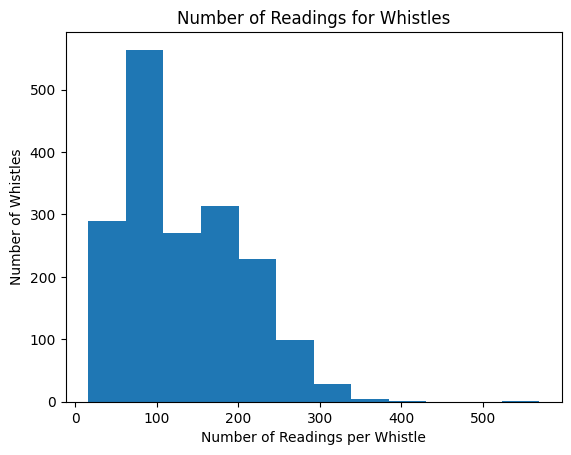

In [6]:
import numpy as np
import matplotlib.pyplot as plt

signature_lengths = [len(signature_whistle) for signature_whistle in signature_whistles]
plt.hist(signature_lengths, bins = 12)

plt.xlabel("Number of Readings per Whistle")
plt.ylabel("Number of Whistles")
plt.title("Number of Readings for Whistles")

plt.show()

## Deciding which models to use ##

The programmer is looking into unsupervised machine learning methods, meaning algorithms that aren't required to be trained by datasets. The programmer observed two of many types of unsupervised methods, dimensionality reduction and clustering. Dimensionality reduction algorithms embed large dimensional data – in this case, the whistle – into lower dimensions.

With the simplification to lower dimensions, a clustering algorithm can be applied. A clustering algorithm tries to cluster whistles that are similar together, based on how far the whistle's embeddings are from each other. For the purposes of our problem, all whistles enclosed in each cluster represent whistles attributed to the same individual dolphin.

The programmer has provided a list below of all the dimensionality reduction and clustering algorithms he has tried out.

Dimensionality Reduction:
* Principal Component Analysis (PCA)
* T-Distributed Stochastic Neighbor Embedding (t-SNE)
* Uniform Manifold Approximation & Projection (UMAP)
* Isometric Embedding (ISOMAP)

Clustering:
* Density-Based Spatial Clustering of Applications with Noise (DBSCAN)
* Gaussian Mixture (GM)

Initially, the programmer also experimented with Kernel Density Estimation (KDE) as a clustering algorithm, but due to time constraints, the programmer has decided to not evaluate it.

The programmer decided to use dimensionality reduction algorithms to compress the whistle and the clustering algorithms to bundle them together. Every possible combination of 1 dimensionality reduction algorithm and 1 clustering algorithm has been tried. The produced whistle clusters from each combination have been compared to the dataset's whistle clusters and evaluated through the **Normalized Mutual Information** score.

The Normalized Mutual Information score (or NMI) measures the amount of information shared between two sets of clusters on a scale from 0.0 (indicating extreme dissimilarity) to 1.0 (indicating extreme similarity).

The **Adjusted Rand Index** score (or ARI) is also tracked, but it is used as a secondary measurement and is not recorded because it makes data more difficult to organize. The Adjusted Rand Index measures the agreement between the items of two sets of clusters.


## Experiments ##
Multiple experiments were conducted, with a dimensionality reduction and clustering algorithm composing each model trialled. The dimensionality reduction and clustering algorithms each have parameters (settings) picked randomly or intentionally, which adjust the behaviour. The Normalized Mutual Information score (amount of information shared between two clusters, on a scale of 0.0 to 1.0) for each algorithm combination are recorded in separate spreadsheets, with each spreadsheet containing the results for different algorithm settings. The NMI Score will be calculated through the Scikit-learn library, as it has plenty of built-in metrics.

Experiments conducted:

0. [Preprocessing](#Preprocessing)
1. [PCA + DBSCAN](#PCA-+-DBSCAN)
2. [PCA + GM](#PCA-+-GM)
3. [TSNE + DBSCAN](#TSNE-+-DBSCAN)
4. [TSNE + GM](#TSNE-+-GM)
5. [UMAP + DBSCAN](#UMAP-+-DBSCAN)
6. [UMAP + GM](#UMAP-+-GM)
7. [ISOMAP + DBSCAN](#ISOMAP-+-DBSCAN)
8. [ISOMAP + GM](#ISOMAP-+-GM)

### Preprocessing ###
Before the whistles can be passed into the models, they need to be processed.

After exploring the dataset, the programmer decided to standardize the whistle lengths to 400 readings. This is simply because a lot of unsupervised machine learning methods that the programmer is planning on using requires fixed size inputs. The dolphin identifier is also matched to a number, as it simplifies some of the programming later on.

In [7]:
# Standardize whistle length to size 400

whistles = []

for signature_whistle in signature_whistles:
    size = len(signature_whistle)
    newsize = 400

    xloc = np.arange(size)
    new_xloc = np.linspace(0, size, newsize)
    new_sw = np.interp(new_xloc, xloc, signature_whistle[" Peak Frequency [Hz]"])
    
    whistles.append(new_sw)
    
print(np.shape(whistles))
print(np.shape(individual_names))

(1800, 400)
(1800,)


In [8]:
# Dolphin identifier (dataset whistle cluster label) matched to a number

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

X = whistles
y = le.fit_transform(individual_names)

y

array([52, 21, 47, ..., 47, 28, 16])

Now we're ready to try out the different dimensionality reduction and clustering algorithms. Generally, the dimensionality reduction algorithm will be indicated by the first model stated and the clustering algorithm being the second (i.e. (Dimensionality Reduction) + (Clustering)).

Each experiment consists of code to first define the algorithms, most of which are part of another library (already built code publically available), then it has the settings for each algorithm defined. The program goes through every pair of settings and computes the Normalized Mutual Information score through the Scikit-learn library. It then stores the score in a matrix; after all the algorithm settings have been tried out, the matrix is saved.

### PCA + DBSCAN ###

In [9]:
from sklearn.cluster import DBSCAN

def dbscan(X_transformed, eps):
    dbs = DBSCAN(eps)
    labels = dbs.fit_predict(X_transformed)
    return labels

In [10]:
from sklearn.decomposition import PCA

def pca(X, n_components):
    pca_ = PCA(n_components = n_components)
    pca_transformed = pca_.fit_transform(X)
    return pca_transformed

In [11]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
import warnings
warnings.filterwarnings("ignore")

best_nmi_score = 0.0
best_ari_score = 0.0
# best_nc = -1
best_eps = -1

num_dbscan_params = 100
num_pca_params = 10

# Define the parameters to test for PCA and DBSCAN
pca_params = range(1, num_pca_params+1)
eps_params = np.random.uniform(size = num_dbscan_params, low = 0, high = 40000)
scores_store = np.empty([num_dbscan_params, 1])

"""
for j in range(num_pca_params):
    # Apply dimensionality reduction with a different setting
    X_transformed = pca(X, pca_params[j])
"""
for i in range(num_dbscan_params):
    # Apply clustering with a different setting
    labels = dbscan(X, eps_params[i])
    adj_r_score = adjusted_rand_score(y, labels)
    nmi_score = normalized_mutual_info_score(y, labels)

    # Store the score of the trial
    scores_store[i] = nmi_score

    # Store the best score
    if best_nmi_score < nmi_score:
        best_nmi_score = nmi_score
        best_ari_score = adj_r_score
        # best_nc = pca_params[j]
        best_eps = eps_params[i]

# Export the scores as an Excel sheet
df_scores = pd.DataFrame(scores_store)
df_scores.columns = ["DBSCAN Score"]
df_scores.index = eps_params
df_scores.to_excel("dbscan_scores.xlsx")

print("Best iteration NMI: " + str(best_nmi_score) + ", ARI: " + str(best_ari_score))
print("Best hyperparams: " + str(best_eps))

Best iteration NMI: 0.5785870151367803, ARI: 0.06334131798740499
Best hyperparams: 20692.991416589117


### PCA + GM ###

In [12]:
from sklearn.mixture import GaussianMixture

def gm(X_transformed, n_components):
    labels = GaussianMixture(n_components = n_components).fit_predict(X_transformed)
    return labels

In [15]:
import warnings
warnings.filterwarnings("ignore")

best_ari_score = 0.0
best_nmi_score = 0.0
# best_nc_pca = -1
best_nc_gm = -1

# Define the parameters to test for PCA and GM
num_gm_params = 100
# num_pca_params = 10
# pca_params = range(1, num_pca_params+1)
gm_params = range(1, num_gm_params+1)
scores_store = np.empty([num_gm_params])

"""
for j in range(num_pca_params):
    # Apply dimensionality reduction with a different setting
    X_transformed = pca(X, pca_params[j])
"""    

for i in range(num_gm_params):
    # Apply clustering with a different setting
    labels = gm(X, gm_params[i])
    nmi_score = normalized_mutual_info_score(y, labels)
    adj_r_score = adjusted_rand_score(y, labels)

    # Store the score of the trial
    scores_store[i] = nmi_score

    # Store best NMI Score and parameters
    if best_nmi_score < nmi_score:
        best_nmi_score = nmi_score
        best_adj_score = adj_r_score
        # best_nc_pca = pca_params[j]
        best_nc_gm = gm_params[i]

# Export scores and parameters as a spreadsheet
df_scores = pd.DataFrame(scores_store)
df_scores.columns = ["Gaussian Mixture Scores"]
df_scores.index = gm_params
df_scores.to_excel("gm_scores.xlsx")

print("Best iteration NMI: " + str(best_nmi_score) + ", ARI: " + str(best_adj_score))
print("Best hyperparams: " + str(best_nc_gm))

Best iteration NMI: 0.8373608202783583, ARI: 0.5981986256405708
Best hyperparams: 74


### PCA + HDBSCAN ###

In [16]:
from sklearn.cluster import HDBSCAN

def hdbscan(X_transformed, eps):
    dbs = HDBSCAN(cluster_selection_epsilon = eps)
    labels = dbs.fit_predict(X_transformed)
    return labels

In [17]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
import warnings
warnings.filterwarnings("ignore")

best_nmi_score = 0.0
best_ari_score = 0.0
# best_nc = -1
best_eps = -1

num_hdbscan_params = 100
num_pca_params = 10

# Define the parameters to test for PCA and HDBSCAN
pca_params = range(1, num_pca_params+1)
eps_params = np.random.uniform(size = num_hdbscan_params, low = 0, high = 40000)
scores_store = np.empty([num_dbscan_params, 1])

"""
for j in range(num_pca_params):
    # Apply dimensionality reduction with a different setting
    X_transformed = pca(X, pca_params[j])
"""
for i in range(num_hdbscan_params):
    # Apply clustering with a different setting
    labels = dbscan(X, eps_params[i])
    adj_r_score = adjusted_rand_score(y, labels)
    nmi_score = normalized_mutual_info_score(y, labels)

    # Store the score of the trial
    scores_store[i] = nmi_score

    # Store the best score
    if best_nmi_score < nmi_score:
        best_nmi_score = nmi_score
        best_ari_score = adj_r_score
        # best_nc = pca_params[j]
        best_eps = eps_params[i]

# Export the scores as an Excel sheet
df_scores = pd.DataFrame(scores_store)
df_scores.columns = ["HDBSCAN Score"]
df_scores.index = eps_params
df_scores.to_excel("hdbscan_scores.xlsx")

print("Best iteration NMI: " + str(best_nmi_score) + ", ARI: " + str(best_ari_score))
print("Best hyperparams: " + str(best_eps))

Best iteration NMI: 0.5787861825969554, ARI: 0.06332990189443133
Best hyperparams: 20776.21107347342


### TSNE + DBSCAN ###

In [14]:
from sklearn.manifold import TSNE

def tsne(X, n_components):
    tsne = TSNE(n_components = n_components)
    X_transformed = tsne.fit_transform(X)
    return X_transformed

In [15]:
# Optimize hyperparameters (eps, n_components)

import warnings
warnings.filterwarnings("ignore")

best_ari_score = 0.0
best_nmi_score = 0.0
best_nc = -1
best_eps = -1

# Define the parameters to test for TSNE and DBSCAN
num_tsne_params = 3
num_dbscan_params = 100
tsne_params = range(1, num_tsne_params+1)
eps = np.random.uniform(size = num_dbscan_params, low = 0.50, high = 1.50)
scores_store = np.empty([num_dbscan_params, num_tsne_params])

for j in range(num_tsne_params):
    # Apply dimensionality reduction algorithm with different setting
    X_transformed = tsne(X, tsne_params[j])
    
    for i in range(num_dbscan_params):
        # Apply clustering algorithm with different setting
        labels = dbscan(X_transformed, eps[i])
        nmi_score = normalized_mutual_info_score(y, labels)
        adj_r_score = adjusted_rand_score(y, labels)
        
        # Store the score of the trial
        scores_store[i][j] = nmi_score
        
        # Store the best score
        if best_nmi_score < nmi_score:
            best_nmi_score = nmi_score
            best_ari_score = adj_r_score
            best_nc = tsne_params[j]
            best_eps = eps[i]
            

# Export the results as an Excel sheet
df_scores = pd.DataFrame(scores_store)
df_scores.columns = tsne_params
df_scores.index = eps
df_scores.to_excel("tsne_dbscan_scores.xlsx")

print("Best iteration NMI: " + str(best_nmi_score) + ", ARI: " + str(best_ari_score))
print("Best hyperparams: " + str(best_nc) + ", " + str(best_eps))

Best iteration NMI: 0.8581021933728515, ARI: 0.6426187123694888
Best hyperparams: 2, 1.4379699339324028


### TSNE + GM ###

In [16]:
import warnings
warnings.filterwarnings("ignore")

best_ari_score = 0.0
best_nmi_score = 0.0
best_nc_tsne = -1
best_nc_gm = -1

num_tsne_params = 3
num_gm_params = 100

# Define the parameters to test for TSNE and GM
tsne_params = range(1, num_tsne_params+1)
gm_params = range(1, num_gm_params+1)
scores_store = np.empty([num_gm_params, num_tsne_params])

for j in range(num_tsne_params):
    # Apply dimensionality reduction algorithm with different setting
    X_transformed = tsne(X, tsne_params[j])
    
    for i in range(num_gm_params):
        # Apply clustering algorithm with different setting
        labels = gm(X_transformed, gm_params[i])
        adj_r_score = adjusted_rand_score(y, labels)
        nmi_score = normalized_mutual_info_score(y, labels)
        
        # Store the score of the trial
        scores_store[i][j] = nmi_score
        
        # Store the best NMI score
        if best_nmi_score < nmi_score:
            best_nmi_score = nmi_score
            best_ari_score = adj_r_score
            best_nc_tsne = tsne_params[j]
            best_nc_gm = gm_params[i]

# Export the results of the experiments as an Excel sheet
df_scores = pd.DataFrame(scores_store)
df_scores.columns = tsne_params
df_scores.index = gm_params
df_scores.to_excel("tsne_gm_scores.xlsx")

print("Best iteration NMI: " + str(best_nmi_score) + ", ARI: " + str(best_ari_score))
print("Best hyperparams: " + str(best_nc_tsne) + ", " + str(best_nc_gm))

Best iteration NMI: 0.867357307734949, ARI: 0.6896413939945676
Best hyperparams: 3, 62


### UMAP + DBSCAN ###

In [17]:
import umap

def umap_embed(X, n_components):
    X_transformed = umap.UMAP(n_components = n_components).fit_transform(X)
    return X_transformed

2024-02-01 21:53:31.888234: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [18]:
import warnings
warnings.filterwarnings("ignore")

best_ari_score = 0.0
best_nmi_score = 0.0
best_nc = -1
best_eps = -1

num_umap_params = 10
num_dbscan_params = 100

# Define the parameters to test for UMAP and DBSCAN
umap_params = range(1, num_umap_params+1)
dbscan_params = np.random.uniform(size = num_dbscan_params, low = 0.05, high = 0.35)
scores_store = np.empty([num_dbscan_params, num_umap_params])

for j in range(num_umap_params):
    # Apply dimensionality reduction with different settings
    X_transformed = umap_embed(X, umap_params[j])

    for i in range(num_dbscan_params):
        # Apply clustering with different settings
        labels = dbscan(X_transformed, dbscan_params[i])
        nmi_score = normalized_mutual_info_score(y, labels)
        adj_r_score = adjusted_rand_score(y, labels)
        
        # Store the score of the trial
        scores_store[i][j] = nmi_score
        
        # Store the best NMI score
        if best_nmi_score < nmi_score:
            best_nmi_score = nmi_score
            best_ari_score = adj_r_score
            best_nc = umap_params[j]
            best_eps = dbscan_params[i]

# Export the experiment scores as an Excel sheet
df_scores = pd.DataFrame(scores_store)
df_scores.columns = umap_params
df_scores.index = dbscan_params
df_scores.to_excel("umap_dbscan_scores.xlsx")

print("Best iteration NMI: " + str(best_nmi_score) + ", ARI: " + str(best_ari_score))
print("Best hyperparams: " + str(best_nc) + ", " + str(best_eps))

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


Best iteration NMI: 0.8630819430220348, ARI: 0.6730290021333599
Best hyperparams: 6, 0.24359921798897038


### UMAP + GM ###

In [19]:
import warnings
warnings.filterwarnings("ignore")

best_ari_score = 0.0
best_nmi_score = 0.0
best_nc_umap = -1
best_nc_gm = -1

num_umap_params = 10
num_gm_params = 100

# Define the parameters to test for UMAP and GM
umap_params = range(1, num_umap_params+1)
gm_params = range(1, num_gm_params+1)
scores_store = np.empty([num_gm_params, num_umap_params])

for j in range(num_umap_params):
    # Apply dimensionality reduction with different settings
    X_transformed = umap_embed(X, umap_params[j])
    
    for i in range(num_gm_params):
        # Apply clustering with different settings
        labels = gm(X_transformed, gm_params[i])
        adj_r_score = adjusted_rand_score(y, labels)
        nmi_score = normalized_mutual_info_score(y, labels)
        
        # Store the score of the trial
        scores_store[i][j] = nmi_score
        
        # Store the best NMI Score
        if best_nmi_score < nmi_score:
            best_nmi_score = nmi_score
            best_ari_score = adj_r_score
            best_nc_umap = umap_params[j]
            best_nc_gm = gm_params[i] 
                 
# Export the results as an Excel file
df_scores = pd.DataFrame(scores_store)
df_scores.columns = umap_params
df_scores.index = gm_params
df_scores.to_excel("umap_gm_scores.xlsx")

print("Best iteration NMI: " + str(best_nmi_score) + ", ARI: " + str(best_ari_score))
print("Best hyperparams: " + str(best_nc_umap) + ", " + str(best_nc_gm))

Best iteration NMI: 0.8697225726149501, ARI: 0.6931048513531398
Best hyperparams: 4, 57


### ISOMAP + DBSCAN ###

In [20]:
from sklearn.manifold import Isomap

def isomap(X, n_components):
    X_transformed = Isomap(n_components = n_components).fit_transform(X)
    return X_transformed

In [21]:
import warnings
warnings.filterwarnings("ignore")

best_ari_score = 0.0
best_nmi_score = 0.0
best_nc = -1
best_eps = -1

num_isomap_params = 50
num_dbscan_params = 100

# Define the parameters for ISOMAP and DBSCAN to use
isomap_params = range(1, num_isomap_params+1)
dbscan_params = np.power(10, np.random.uniform(size = num_dbscan_params, low = 1.00, high = 5.00))
scores_store = np.empty([num_dbscan_params, num_isomap_params])

for j in range(num_isomap_params):
    # Apply dimensionality reduction with different settings
    X_transformed = isomap(X, isomap_params[j])
    
    for i in range(num_dbscan_params):
        # Apply clustering with different settings
        labels = dbscan(X_transformed, dbscan_params[i])
        nmi_score = normalized_mutual_info_score(y, labels)
        adj_r_score = adjusted_rand_score(y, labels)
        
        # Store the score of the trial
        scores_store[i][j] = nmi_score
        
        # Store the best NMI Score
        if best_nmi_score < nmi_score:
            best_nmi_score = nmi_score
            best_ari_score = adj_r_score
            best_nc = isomap_params[j]
            best_eps = dbscan_params[i]
            
# Export the results as an Excel file
df_scores = pd.DataFrame(scores_store)
df_scores.columns = isomap_params
df_scores.index = dbscan_params
df_scores.to_excel("isomap_dbscan_scores.xlsx")

print("Best iteration NMI: " + str(best_nmi_score) + ", ARI: " + str(best_ari_score))
print("Best hyperparams: " + str(best_nc) + ", " + str(best_eps))

Best iteration NMI: 0.7359351997720335, ARI: 0.2291632589594213
Best hyperparams: 47, 39630.016284477664


### ISOMAP + GM ###

In [22]:
import warnings
warnings.filterwarnings("ignore")

best_ari_score = 0.0
best_nmi_score = 0.0
best_nc_isomap = -1
best_nc_gm = -1

num_isomap_params = 50
num_gm_params = 100

# Define the parameters for ISOMAP and GM to use
isomap_params = range(1, num_isomap_params+1)
gm_params = range(1, num_gm_params+1)
scores_store = np.empty([num_gm_params, num_isomap_params])

for j in range(num_isomap_params):
    # Apply dimensionality reduction with different settings
    X_transformed = isomap(X, isomap_params[j])
    
    for i in range(num_gm_params):
        # Apply clustering with different settings
        try:
            labels = gm(X_transformed, gm_params[i])
        except:
            print("ISOMAP Parameter: " + str(j) + ", GM Parameter: " + str(i) + " is invalid, trying again...")
            break
        
        adj_r_score = adjusted_rand_score(y, labels)
        nmi_score = normalized_mutual_info_score(y, labels)
        
        # Store the score of the trial
        scores_store[i][j] = nmi_score
        
        # Store the best NMI Score
        if best_nmi_score < nmi_score:
            best_nmi_score = nmi_score
            best_ari_score = adj_r_score
            best_nc_isomap = isomap_params[j]
            best_nc_gm = gm_params[i]
            
# Export the results as an Excel file
df_scores = pd.DataFrame(scores_store)
df_scores.columns = isomap_params
df_scores.index = gm_params
df_scores.to_excel("isomap_gm_scores.xlsx")

print("Best iteration NMI: " + str(best_nmi_score) + ", ARI: " + str(best_ari_score))
print("Best hyperparams: " + str(best_nc_isomap) + ", " + str(best_nc_gm))

ISOMAP Parameter: 1, GM Parameter: 32 is invalid, trying again...
ISOMAP Parameter: 27, GM Parameter: 85 is invalid, trying again...
ISOMAP Parameter: 30, GM Parameter: 26 is invalid, trying again...
ISOMAP Parameter: 31, GM Parameter: 95 is invalid, trying again...
ISOMAP Parameter: 33, GM Parameter: 99 is invalid, trying again...
ISOMAP Parameter: 34, GM Parameter: 65 is invalid, trying again...
ISOMAP Parameter: 40, GM Parameter: 26 is invalid, trying again...
ISOMAP Parameter: 41, GM Parameter: 50 is invalid, trying again...
ISOMAP Parameter: 42, GM Parameter: 57 is invalid, trying again...
ISOMAP Parameter: 43, GM Parameter: 8 is invalid, trying again...
ISOMAP Parameter: 44, GM Parameter: 98 is invalid, trying again...
ISOMAP Parameter: 45, GM Parameter: 13 is invalid, trying again...
ISOMAP Parameter: 46, GM Parameter: 5 is invalid, trying again...
ISOMAP Parameter: 47, GM Parameter: 7 is invalid, trying again...
ISOMAP Parameter: 48, GM Parameter: 62 is invalid, trying again...

The Gaussian Mixture model can run into problems with certain input. Trying to understand why this happens requires further investigation, but to keep it simple, the invalid input are simply skipped.

## Analysis & Results ##
After conducting experiments, it is important to analyze the effectiveness of each algorithm pair. The 5 most optimal settings of each algorithm pair are picked and experimented with. Their mean and standard deviation are calculated to evaluate how accurate and consistent the classifications are.

In [28]:
import pandas as pd

# Clustering algorithms
cluster_algorithms = ["dbscan", "hdbscan", "gm"]
algo_params_dict = {}

for cluster_algo in cluster_algorithms:
    # Access each algorithm pair's results
    score_df = pd.read_excel(cluster_algo + "_scores.xlsx", index_col = 0)
    cluster_params = score_df.index

    # Pick out top 5 highest performing parameter pairs from matrix
    scores_matrix = score_df.to_numpy()
    top_5_params_indexes = scores_matrix.flatten().argsort()[-5:]

    list_param_pairs = []

    # Pick out embedding and clustering algorithm parameters from matrix and store
    for index in top_5_params_indexes:
        cluster_param = cluster_params[index]
        list_param_pairs.append((0, cluster_param))

    algo_params_dict[cluster_algo] = list_param_pairs

In [29]:
# Block of code to evaluate 
# Separated because this chunk of code needs to be called again and again

def evaluate_algorithm(X, y, dr_algo, cluster_algo, params, trial_num):
    # Time algorithm runtime
    start_time = time.time_ns()
    
    # Apply the dimensionality reduction algorithm with the appropriate parameter
    if dr_algo == "pca":
        X_transformed = pca(X, params[0])
    elif dr_algo == "tsne":
        X_transformed = tsne(X, params[0])
    elif dr_algo == "umap":
        X_transformed = umap_embed(X, params[0])
    elif dr_algo == "isomap":
        X_transformed = isomap(X, params[0])
    else:
        X_transformed = X

    # Apply the clustering algorithm with the appropriate parameter
    if cluster_algo == "dbscan":
        labels = dbscan(X_transformed, params[1])
    elif cluster_algo == "gm":
        labels = gm(X_transformed, params[1])
    elif cluster_algo == "hdbscan":
        labels = hdbscan(X_transformed, params[1])

    end_time = time.time_ns()

    # Score the predictions of the algorithm pair
    nmi_score = normalized_mutual_info_score(y, labels)
    ari_score = adjusted_rand_score(y, labels)
    
    # Gather all the relevant information together
    row_to_append = {"Dimensionality Reduction algorithm": dr_algo, "Clustering algorithm": cluster_algo, 
                     "Dimensionality Reduction parameter": params[0], "Clustering parameter": params[1], 
                     "Trial number": trial_num, "NMI Score": nmi_score, "ARI Score": ari_score, 
                     "Time taken (ms)": (end_time-start_time) // 1_000_000}
    
    return row_to_append

In [30]:
import random
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
import time

# Create a results table and start populating it
results_df = pd.DataFrame(columns = ["Dimensionality Reduction algorithm", "Clustering algorithm", 
                                     "Dimensionality Reduction parameter", "Clustering parameter", 
                                     "Trial number", "NMI Score", "ARI Score", "Time taken (ms)"])

for pair, top_params in algo_params_dict.items():
    dr_algo, cluster_algo = "N/A", pair
    
    # Assess whether shuffling the dataset has any impact on the quality of classifications
    for params in top_params:
        # 5 trials, randomly shuffling the dataset
        for trial_num in range(1, 5+1):
            X_to_shuffle = X.copy()
            y_to_shuffle = y.copy()

            # Shuffle the dataset
            zipped_list_dataset = list(zip(X_to_shuffle, y_to_shuffle))
            random.shuffle(zipped_list_dataset)

            X_to_shuffle, y_to_shuffle = zip(*zipped_list_dataset)

            # Evaluate and gather rows together
            row_to_append = evaluate_algorithm(X_to_shuffle, y_to_shuffle, dr_algo, cluster_algo, params, trial_num)
            results_df.loc[len(results_df)] = row_to_append

In [31]:
# Note: .head() used to get first 5 rows, get an idea of how the (large) table looks
results_df.head()

,Dimensionality Reduction algorithm,Clustering algorithm,Dimensionality Reduction parameter,Clustering parameter,Trial number,NMI Score,ARI Score,Time taken (ms)
0,N/A,dbscan,0,20152.827688,1,0.568268,0.061607,123
1,N/A,dbscan,0,20152.827688,2,0.568268,0.061607,67
2,N/A,dbscan,0,20152.827688,3,0.568293,0.061624,50
3,N/A,dbscan,0,20152.827688,4,0.568293,0.061624,41
4,N/A,dbscan,0,20152.827688,5,0.568223,0.061570,41



**Remarks:** The results of each method's trials are averaged out to get a general indication of how effective the algorithm is in general with its chosen parameters.


In [32]:
# Standard Deviations of Normalized Mutual Information and Adjusted Rand Index scores
# Reformat the table to look more presentable

results_std = results_df.groupby(["Dimensionality Reduction algorithm", "Clustering algorithm", 
                                  "Dimensionality Reduction parameter", "Clustering parameter"]).std()
results_std.drop(columns = ["Trial number"], inplace = True)
results_std.rename(columns = {"NMI Score": "NMI StD", "ARI Score": "ARI StD"}, inplace = True)
results_std.head()

NMI StD  \
Dimensionality Reduction algorithm Clustering algorithm Dimensionality Reduction parameter Clustering parameter                 
N/A                                dbscan               0                                  20152.827688          2.856915e-05   
                                                                                           20314.806646          1.356568e-05   
                                                                                           20613.455881          5.551115e-17   
                                                                                           20637.670510          1.288818e-05   
                                                                                           20692.991417          8.341082e-05   

                                                                                                                  ARI StD  \
Dimensionality Reduction algorithm Clustering algorithm Dimensionality Reduction parameter Clustering parameter             
N/A                                dbscan               0                                  20152.827688          0.000022   
                                                                                           20314.806646          0.000009   
                                                                                           20613.455881          0.000000   
                                                                                           20637.670510          0.000014   
                                                                                           20692.991417          0.000029   

                                                                                                                 Time taken (ms)  
Dimensionality Reduction algorithm Clustering algorithm Dimensionality Reduction parameter Clustering parameter                   
N/A                                dbscan               0                                  20152.827688                34.435447  
                                                                                           20314.806646                 1.095445  
                                                                                           20613.455881                 3.781534  
                                                                                           20637.670510                 1.673320  
                                                                                           20692.991417                 2.000000

In [33]:
# Averages of Normalized Mutual Information and Adjusted Rand Index scores
# Reformat the table to look more presentable

averaged_results_df = results_df.groupby(["Dimensionality Reduction algorithm", "Clustering algorithm", 
                                          "Dimensionality Reduction parameter", "Clustering parameter"]).mean()
averaged_results_df.drop(columns = ["Trial number"], inplace = True)
averaged_results_df.rename(columns = {"NMI Score": "NMI Mean", "ARI Score": "ARI Mean"}, inplace = True)
averaged_results_df.head()

NMI Mean  \
Dimensionality Reduction algorithm Clustering algorithm Dimensionality Reduction parameter Clustering parameter             
N/A                                dbscan               0                                  20152.827688          0.568269   
                                                                                           20314.806646          0.571839   
                                                                                           20613.455881          0.577034   
                                                                                           20637.670510          0.577639   
                                                                                           20692.991417          0.578544   

                                                                                                                 ARI Mean  \
Dimensionality Reduction algorithm Clustering algorithm Dimensionality Reduction parameter Clustering parameter             
N/A                                dbscan               0                                  20152.827688          0.061607   
                                                                                           20314.806646          0.062062   
                                                                                           20613.455881          0.063373   
                                                                                           20637.670510          0.063517   
                                                                                           20692.991417          0.063347   

                                                                                                                 Time taken (ms)  
Dimensionality Reduction algorithm Clustering algorithm Dimensionality Reduction parameter Clustering parameter                   
N/A                                dbscan               0                                  20152.827688                     64.4  
                                                                                           20314.806646                     42.2  
                                                                                           20613.455881                     51.6  
                                                                                           20637.670510                     42.4  
                                                                                           20692.991417                     44.0

In [34]:
# Scale the Standard Deviation with the Average, so that it is easier to interpret

averaged_results_df["NMI StD / Mean"] = results_std["NMI StD"] / averaged_results_df["NMI Mean"]
averaged_results_df.head()

NMI Mean  \
Dimensionality Reduction algorithm Clustering algorithm Dimensionality Reduction parameter Clustering parameter             
N/A                                dbscan               0                                  20152.827688          0.568269   
                                                                                           20314.806646          0.571839   
                                                                                           20613.455881          0.577034   
                                                                                           20637.670510          0.577639   
                                                                                           20692.991417          0.578544   

                                                                                                                 ARI Mean  \
Dimensionality Reduction algorithm Clustering algorithm Dimensionality Reduction parameter Clustering parameter             
N/A                                dbscan               0                                  20152.827688          0.061607   
                                                                                           20314.806646          0.062062   
                                                                                           20613.455881          0.063373   
                                                                                           20637.670510          0.063517   
                                                                                           20692.991417          0.063347   

                                                                                                                 Time taken (ms)  \
Dimensionality Reduction algorithm Clustering algorithm Dimensionality Reduction parameter Clustering parameter                    
N/A                                dbscan               0                                  20152.827688                     64.4   
                                                                                           20314.806646                     42.2   
                                                                                           20613.455881                     51.6   
                                                                                           20637.670510                     42.4   
                                                                                           20692.991417                     44.0   

                                                                                                                 NMI StD / Mean  
Dimensionality Reduction algorithm Clustering algorithm Dimensionality Reduction parameter Clustering parameter                  
N/A                                dbscan               0                                  20152.827688            5.027399e-05  
                                                                                           20314.806646            2.372289e-05  
                                                                                           20613.455881            9.620076e-17  
                                                                                           20637.670510            2.231182e-05  
                                                                                           20692.991417            1.441737e-04

In [35]:
# Highest scaled standard deviation (highest % error)
averaged_results_df["NMI StD / Mean"].max()

0.006284499729264775

**Remarks:** From dividing the standard deviation by the mean of the 5 trials of each method, it can be observed that the method is precise, yielding a very low standard deviation. The highest standard deviation to mean ratio was around 1%, meaning that the predictions had around 1% error, making it incredibly precise.

In [36]:
# Fetching the top 3 in terms of accuracy (NMI Mean)
averaged_results_df.loc[averaged_results_df["NMI Mean"].idxmax()]

NMI Mean              0.829334
ARI Mean              0.562021
Time taken (ms)    7970.800000
NMI StD / Mean        0.002818
Name: (N/A, gm, 0, 96.0), dtype: float64

**Remarks:** The algorithm composed of a UMAP with 3 components and Gaussian Mixture with 64 components is observed to be the most accurate algorithm, with a Normalized Mutual Information score of 0.865. It is fairly precise, as well with only a 0.5% standard deviation to mean ratio. This indicates a very strong similarity between the labels the method predicted and the actual labels. The algorithm took 4.8 seconds to compute. However, it would be good to observe the other algorithms, so the top 5 have been fetched below:

### Top 5 method performances ###

In [37]:
sorted_results_df = averaged_results_df.sort_values(by = ["NMI Mean", "Time taken (ms)"], ascending = False)

# Grabs the top 5 algorithm pairs
sorted_results_df.iloc[0:5]

NMI Mean  \
Dimensionality Reduction algorithm Clustering algorithm Dimensionality Reduction parameter Clustering parameter             
N/A                                gm                   0                                  96.0                  0.829334   
                                                                                           89.0                  0.828964   
                                                                                           99.0                  0.828437   
                                                                                           77.0                  0.827517   
                                                                                           74.0                  0.826020   

                                                                                                                 ARI Mean  \
Dimensionality Reduction algorithm Clustering algorithm Dimensionality Reduction parameter Clustering parameter             
N/A                                gm                   0                                  96.0                  0.562021   
                                                                                           89.0                  0.565956   
                                                                                           99.0                  0.559702   
                                                                                           77.0                  0.565064   
                                                                                           74.0                  0.562528   

                                                                                                                 Time taken (ms)  \
Dimensionality Reduction algorithm Clustering algorithm Dimensionality Reduction parameter Clustering parameter                    
N/A                                gm                   0                                  96.0                           7970.8   
                                                                                           89.0                           7102.4   
                                                                                           99.0                           6808.8   
                                                                                           77.0                           6361.0   
                                                                                           74.0                           4937.2   

                                                                                                                 NMI StD / Mean  
Dimensionality Reduction algorithm Clustering algorithm Dimensionality Reduction parameter Clustering parameter                  
N/A                                gm                   0                                  96.0                        0.002818  
                                                                                           89.0                        0.006284  
                                                                                           99.0                        0.001478  
                                                                                           77.0                        0.004765  
                                                                                           74.0                        0.003490

In [38]:
sorted_results_df.to_excel("clustering-only.xlsx")

**Remarks:** The top 5 methods all perform very similarly, ranging from a mean NMI of 0.863-0.865, making them comparatively accurate. Considering speed, it would perhaps be more efficient to consider UMAP and Gaussian Mixture as a combination than TSNE and Gaussian Mixture, as UMAP and GM is almost 3 times faster than TSNE and GM. They all have a negligible standard deviation to mean ratio of roughly 0.2%-0.5%, making them all comparatively precise.

## Conclusion & Future Work ##
The motivation behind exploring unsupervised methods was that not as much data is needed to train the methods, and the versatility of these methods can be applied to multiple problems fast. In terms of accuracy, the final model (UMAP 3 components, Gaussian Mixture 64 components) had a Normalized Mutual Information (NMI) score of 0.864. As a comparison, Rosie Day's Masters thesis found that ARTwarp had an NMI score of 0.88 on the same Sarasota dataset. With the 5 trials, the algorithm was fairly precise with the largest NMI standard deviation to mean ratio being ~1%. The main intent with the project was not necessarily to outperform ARTWarp in accuracy, but certainly in speed, with ARTWarp taking 10 days for the Sarasota dataset vs. the unsupervised method's **4.8 seconds**).

In the future, the programmer would like to further analyze the variation between the Adjusted Rand Index and the Normalized Mutual Information scores, as they were on a time constraint. The programmer would also love to explore how each of the top methods perform on another dataset, either a signature whistle or species classification problem, as the strength of an unsupervised method is that it can be applied to multiple problems. However, the programmer understands that they had a one semester time constraint and performed to the best of their abilities.

## Past Work ##

THE NOTES BELOW ARE VERY ROUGHLY WRITTEN.

Deprecated (replaced by Sarasota whistle dataset). For the first 3 weeks or so of the semester, this was most of the work that was done. The programmer decided to document this, as they or someone else on the team could pursue using the Hawaii contours dataset – for classifying dolphin species by whistles in the future – and may need this. The past work is largely Exploratory Data Analysis of the Hawaii dataset and experiments with Kernel Density Estimation, a method that could be used for clustering, but due to time constraints, the programmer couldn't fully integrate them. The programmer has done their best job to document the code, but if a future team member has any questions, they shouldn't hesitate to contact Ayam Babu at ab550@st-andrews.ac.uk.

In [34]:
import pandas as pd
contour = pd.read_csv("SbHawaiiContours/220447/sel_01_1705_1705_20170929_220447_ROCCA.csv")

In [35]:
import os
from glob import glob

PATH = "/Users/ayambabu/Documents/VIP: Dolphin Acoustics/whistle-classification/SbHawaiiContours"
EXT = "*.csv"

all_csv_files = [file
                 for path, subdir, files in os.walk(PATH)
                 for file in glob(os.path.join(path, EXT))]
all_csv_files[0:5]

['/Users/ayambabu/Documents/VIP: Dolphin Acoustics/whistle-classification/SbHawaiiContours/220447/sel_02_1705_1705_20170929_220447_ROCCA.csv',
 '/Users/ayambabu/Documents/VIP: Dolphin Acoustics/whistle-classification/SbHawaiiContours/220447/sel_01_1705_1705_20170929_220447_ROCCA.csv',
 '/Users/ayambabu/Documents/VIP: Dolphin Acoustics/whistle-classification/SbHawaiiContours/220447/sel_03_1705_1705_20170929_220447_ROCCA.csv',
 '/Users/ayambabu/Documents/VIP: Dolphin Acoustics/whistle-classification/SbHawaiiContours/s234/sel_05_20021020_114236_ROCCA.csv',
 '/Users/ayambabu/Documents/VIP: Dolphin Acoustics/whistle-classification/SbHawaiiContours/s234/sel_02_20021020_114104_ROCCA.csv']

In [36]:
# Number of whistles
len(all_csv_files)

1054

In [37]:
# Average whistle size
np.mean([len(pd.read_csv(all_csv_files[i])) for i in range(len(all_csv_files))])

383.0066413662239

In [38]:
import numpy as np
X = []

for i in range(len(all_csv_files)):
    df = pd.read_csv(all_csv_files[i])

    size = len(df)
    newsize = 400

    # Scale the whistles to a fixed length
    xloc = np.arange(size)
    new_xloc = np.linspace(0, size, newsize)

    data = df[" Peak Frequency [Hz]"]
    new_data = np.interp(new_xloc, xloc, data)
    
    # Collate the whistles
    X.append(new_data)
    
print("Length of dataset: " + str(len(X)))
print("Length of scaled whistle: " + str(len(X[0])))

Length of dataset: 1054
Length of scaled whistle: 400


In [39]:
pd.DataFrame(X).to_excel("processed-whistles.xlsx")

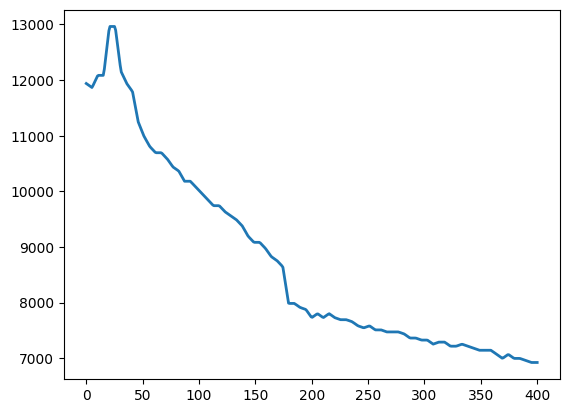

In [40]:
import matplotlib.pyplot as plt

# Plot a whistle to have a look
x = X[6]
t = np.linspace(0, len(x), len(x))
fig, ax = plt.subplots()
ax.plot(t, x, linewidth = 2.0)
plt.show()

### PCA + KDE ###

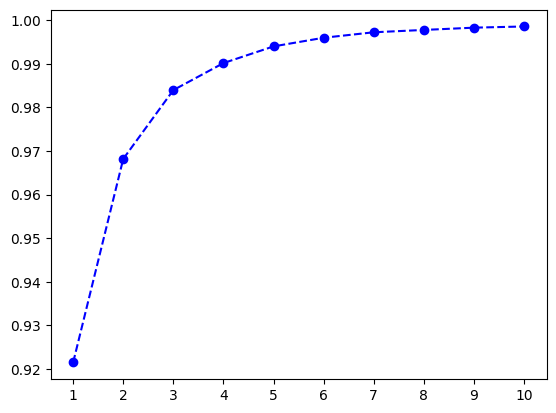

In [41]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

n_components = 10
pca = PCA(n_components = n_components)
pca.fit(X)

# First PCA Component explains most variance
# Cumsum / Cumulative Sum: Sum across the first n components
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1, n_components + 1), cumulative_explained_variance, '--bo')
plt.xticks(np.arange(1, n_components + 1, 1.0))
plt.show()

In [42]:
# Find concentrations of value and cluster them
def kde_clusters(X_transformed):
    clusters = []
    density = gaussian_kde(np.asarray(X_transformed).ravel())
    xgrid = np.linspace(min(np.asarray(X_transformed).ravel()), 
                        max(np.asarray(X_transformed).ravel()), 
                        len(X_transformed)) 

    mi, ma = argrelextrema(density(xgrid), np.less)[0], argrelextrema(density(xgrid), np.greater)[0]
    print("Minima:", xgrid[mi])
    print("Maxima:", xgrid[ma])

    plt.plot(xgrid, density(xgrid))
    plt.show()
    
    a = xgrid
    clusters.append(a[a <= xgrid[mi][0]])
    for i in range(len(mi) - 1):
        clusters.append(a[(a >= xgrid[mi][i]) * (a <= xgrid[mi][i + 1])])

    clusters.append(a[a >= xgrid[mi][-1]])
    return clusters

Minima: [-98311.12872411 -81784.15017705 -71867.96304881 -48730.19308292
 -30550.51668115  40515.49107122  68611.35460123  76874.84387476
  90096.42671241  96707.21813124 104970.70740477 113234.1966783
 123150.38380654 133066.57093478 156204.34090067 162815.13231949
 174384.01730244 210743.37010598 273545.88858482]
Maxima: [-1.08227316e+05 -8.67422437e+04 -7.51733588e+04 -5.20355888e+04
 -3.55086102e+04 -8.01955296e+02  4.38208868e+04  7.35694482e+04
  8.18329374e+04  9.17491246e+04  1.00012614e+05  1.06623405e+05
  1.18192290e+05  1.26455780e+05  1.46288154e+05  1.61162434e+05
  1.64467830e+05  1.84300204e+05  2.37186536e+05  3.08252544e+05
  1.06684086e+06]


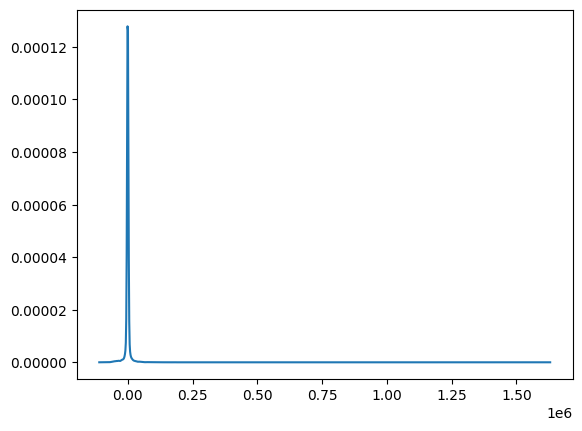

20


In [43]:
# Demonstrate PCA + KDE

from sklearn.mixture import GaussianMixture
from scipy.stats import gaussian_kde
from scipy.signal import argrelextrema

n_components = 20
pca = PCA(n_components = n_components)
pca_components = pca.fit_transform(X)

"""
g = GaussianMixture()
g.fit_predict(pca_components)
"""

clusters = kde_clusters(pca_components)
print(len(clusters))

### UMAP + KDE ###

Minima: [ 0.85189291 19.74131625]
Maxima: [-7.60550175 11.09763535 22.38658066]


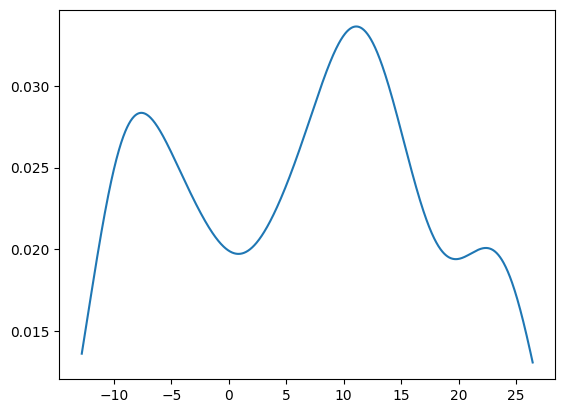

3


In [44]:
import umap

X_transformed = umap.UMAP(n_components = 1).fit_transform(X)
umap_kde_clusters = kde_clusters(X_transformed)
print(len(umap_kde_clusters))

Minima: [5.03768162]
Maxima: [0.38363908 6.5359008 ]


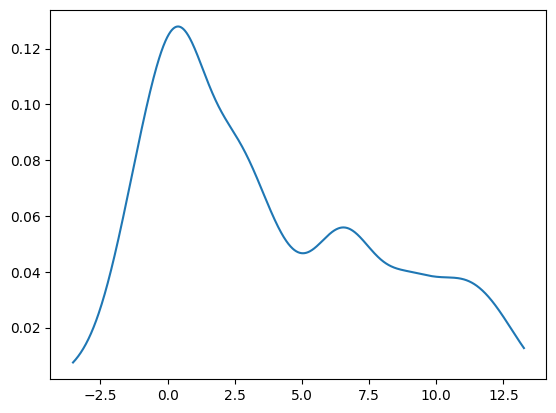

2


In [45]:
X_transformed = umap.UMAP(n_components = 2).fit_transform(X)
umap_kde_clusters = kde_clusters(X_transformed)
print(len(umap_kde_clusters))

**Remarks:** The clusters concentrations look different, which means that there is a different sized cluster for both, indicating that the variation of the UMAP embedding parameter affects the clustering. However, because this dataset doesn't have labels, it is difficult to evaluate which method is better. This applies for all the methods tried, including ISOMAP and PCA.

### ISOMAP + KDE ###

Minima: [ 328514.70078619  735435.52596756 1386850.79653102]
Maxima: [  -8306.31837655  362709.72811235 1106451.57245646]


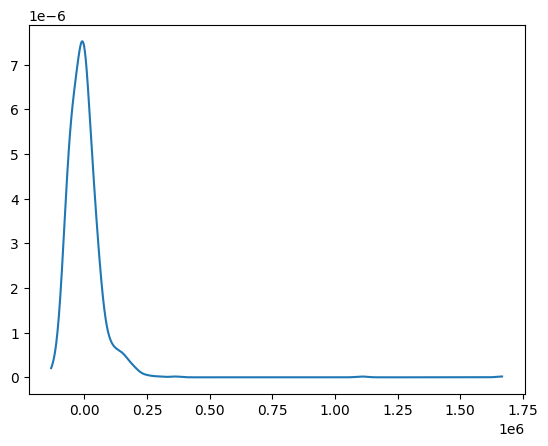

4


In [46]:
from sklearn.manifold import Isomap
X_transformed = Isomap(n_components = 1).fit_transform(X)
isomap_kde_clusters = kde_clusters(X_transformed)
print(len(isomap_kde_clusters))

Minima: [ 134475.25220158  237116.41972863  269619.4561122   329493.47050298
  734926.08223484 1386697.49603163]
Maxima: [   2752.42054186  146450.05507973  245669.85035588  285015.63124125
  361996.50688655 1107855.65758314]


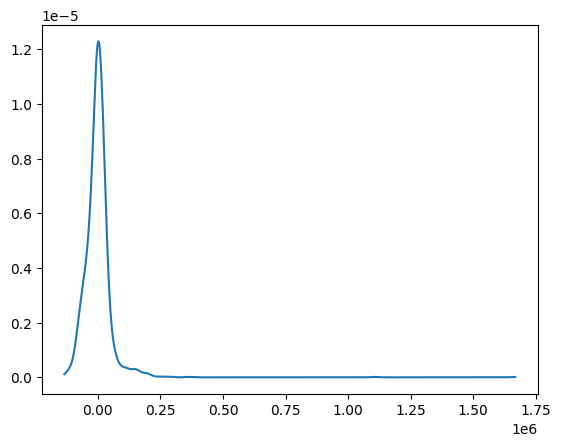

7


In [47]:
from sklearn.manifold import Isomap
X_transformed = Isomap(n_components = 2).fit_transform(X)
isomap_kde_clusters = kde_clusters(X_transformed)
print(len(isomap_kde_clusters))

Minima: [ 129343.19382522  184085.14983965  231984.36135228  267908.76998675
  327782.78437753  734926.08223484 1386697.49603163]
Maxima: [   4463.10666731  148160.74120518  189217.20821601  247380.53648134
  286726.31736671  361996.50688655 1107855.65758314]


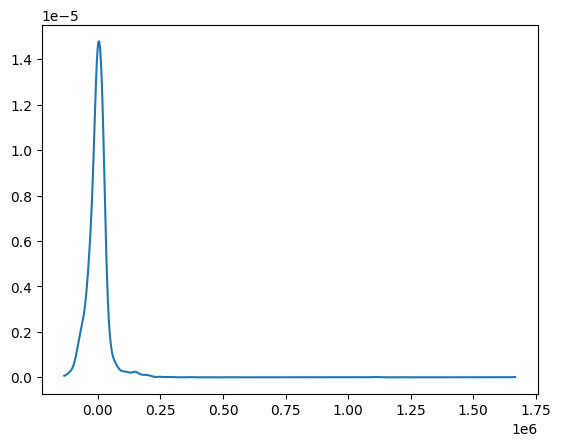

8


In [48]:
from sklearn.manifold import Isomap
X_transformed = Isomap(n_components = 3).fit_transform(X)
isomap_kde_clusters = kde_clusters(X_transformed)
print(len(isomap_kde_clusters))